In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d  
from smpl_webuser.serialization import load_model
from lib.viz import plot_mattress
from lib.constants import set_format, constants

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
set_format('clever')

In [4]:
SAMPLE = 0

In [5]:
info = pd.read_pickle('real/S103/participant_info_red.p')
info

{'height_in': 68.0,
 'gender': 'f',
 'weight_lbs': 186.0,
 'prescribed_pose_type': ['rollpi',
  'rollpi_plo',
  'sl',
  'phu',
  'sl',
  'hbh',
  'rollpi_plo',
  'rollpi',
  'sl',
  'rollpi_plo',
  'rollpi_plo',
  'supine',
  'rollpi_plo',
  'phu',
  'supine_plo',
  'sl',
  'rollpi',
  'phu',
  'rollpi_plo',
  'rollpi',
  'hbh',
  'phu',
  'xl',
  'supine_plo',
  'hbh',
  'rollpi_plo',
  'supine',
  'rollpi',
  'supine',
  'rollpi',
  'rollpi_plo',
  'supine_plo',
  'rollpi_plo',
  'xl',
  'rollpi',
  'rollpi',
  'rollpi',
  'xl',
  'supine_plo',
  'xl',
  'rollpi',
  'hbh',
  'rollpi',
  'rollpi_plo',
  'rollpi_plo',
  'rollpi_plo',
  'supine',
  'rollpi'],
 'p_select_pose_type': ['no_instr',
  'supine',
  'r_lateral',
  'l_lateral',
  'prone']}

In [6]:
data = pd.read_pickle('real/S103/p_select.p')

In [7]:
data.keys()

dict_keys(['pmat_corners', 'pose_type', 'depth', 'pc', 'RGB', 'images'])

In [8]:
len(data['images'])

5

In [9]:
data = pd.read_pickle('real/S103/prescribed.p')

In [10]:
data.keys()

dict_keys(['pmat_corners', 'pose_type', 'depth', 'pc', 'RGB', 'images'])

In [11]:
len(data['images'])

48

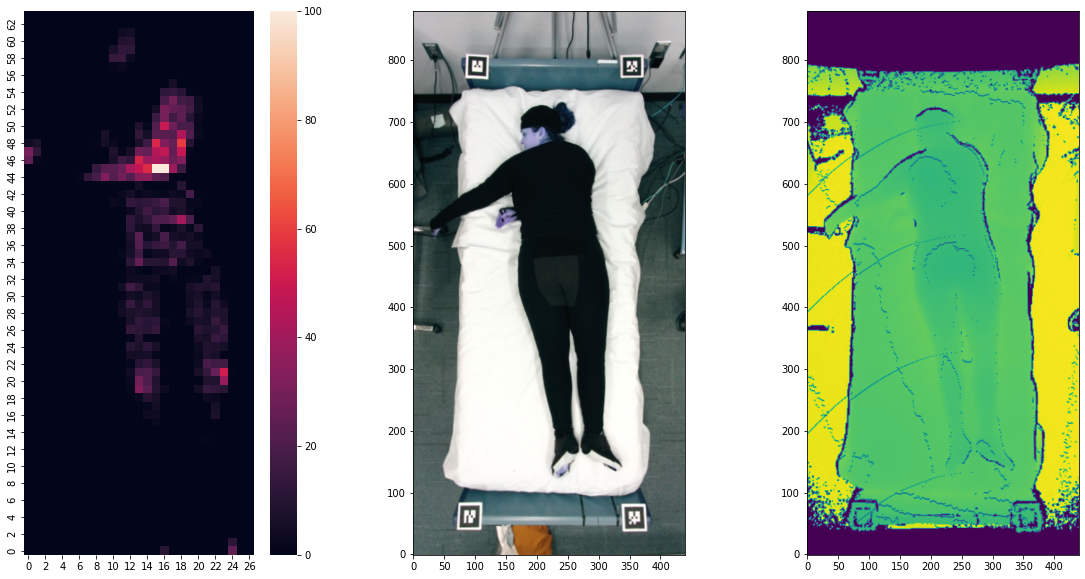

In [12]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20, 10)
plot_mattress(np.reshape(data['images'][SAMPLE], (constants.SENSORS_Y, constants.SENSORS_X)), ax=ax[0])
ax[1].imshow(np.flip(data['RGB'][SAMPLE], axis=0))
ax[1].invert_yaxis()
ax[2].imshow(np.transpose(data['depth'][SAMPLE]))
ax[2].invert_yaxis()

In [13]:
num_points = len(data['pc'][SAMPLE])
xyz = np.zeros((num_points, 3))
xyz[:, 0] = np.reshape(data['pc'][SAMPLE][:,0], -1)
xyz[:, 1] = np.reshape(data['pc'][SAMPLE][:,1], -1)
xyz[:, 2] = np.reshape(data['pc'][SAMPLE][:,2], -1)
xyz

array([[ 1.38482003e+00,  6.36210870e-05, -1.67965040e-02],
       [ 1.38766656e+00,  3.11525964e-04, -1.76803314e-02],
       [ 1.39050928e+00,  5.59378996e-04, -1.85641976e-02],
       ...,
       [ 8.38566859e-02,  7.28023464e-01, -5.87636194e-02],
       [ 7.10769056e-02,  7.32312489e-01, -5.33063040e-02],
       [ 7.47644775e-02,  7.32111907e-01, -5.41533864e-02]])

In [14]:
cloud = o3d.geometry.PointCloud()
cloud.points = o3d.utility.Vector3dVector(xyz)
    
o3d.visualization.draw_geometries([cloud])